# Play Store apps data cleaning and preprocessing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("googleplaystore.csv")

## First Analysis

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape

(10841, 13)

In [7]:
df = df.drop_duplicates()                  # Delete All duplicates 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df = df.drop_duplicates(subset=['App'], keep='first') # Delete all duplicates in apps name


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [11]:
df.describe()

,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
df.shape

(9660, 13)

## Category Column cleaning 

In [13]:
df = df[df["Category"] != "1.9"]    # Delete this row 

In [14]:
df['Category'] = df['Category'].str.title()   # Convert all category names to title case format (capitalize each word)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Column Size cleaning 

In [16]:
df["Size"] = df["Size"].replace("Varies with device", np.nan) # replace Varies with device to nan


In [17]:
def convert_size(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().upper().replace(",", "")
    try:
        if value.endswith("M"):          # Meganyte
            return float(value[:-1])
        elif value.endswith("K"):        # Kilobyte into Megabyte
            return float(value[:-1]) / 1024
        else:
            return np.nan
    except:
        return np.nan

df["Size"] = df["Size"].apply(convert_size)



In [18]:
df["Size"].value_counts()

Size
11.000000    182
12.000000    181
13.000000    177
14.000000    177
15.000000    163
            ... 
0.539062       1
0.864258       1
0.996094       1
0.568359       1
0.604492       1
Name: count, Length: 459, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [20]:
median_by_category = df.groupby("Category")["Size"].median()  # Calculate Median  for size column based on category

def fill_invalid_size(row):
    value = row["Size"]
    category = row["Category"]
    median_value = median_by_category.get(category, np.nan)
    
    
    if pd.isna(value) or value < 1: #if value is nan or smaller than 1 replace it into median
        return median_value
    else:
        return value
 
df["Size"] = df.apply(fill_invalid_size, axis=1) # apply it on the column size

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


## Cleaning Type column

In [22]:
df["Type"] = df["Type"].fillna("Free") # Replace any nan into Free value

In [23]:
df["Type"].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

## Cleaning Content Rating column

In [24]:
df["Content Rating"] = df["Content Rating"].str.title() # Standardize content rating text by converting it to title case

## Drop some columns

In [25]:
df = df.drop(columns=["Current Ver", "Last Updated"]) # drop these two columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Android Ver     9657 non-null   object 
dtypes: float64(2), object(9)
memory usage: 905.5+ KB


## Cleaning Review column

In [27]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce") # Convert the Reviews column to numeric values; invalid entries become NaN

In [28]:
median_rating_by_cat = df.groupby("Category")["Rating"].median() # Calculate median of rating based on category 
 
df["Rating"] = df.apply(
    lambda row: median_rating_by_cat[row["Category"]] if pd.isna(row["Rating"]) else row["Rating"], # Apply each v=nan value with median based on category 
    axis=1
)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 905.5+ KB


## Clean Price column

In [30]:

df["Price"] = ( 
    df["Price"]
    .astype(str)               # Ensure all values are treated as strings
    .str.replace("$", "", regex=False)  # Remove the dollar sign
    .str.strip()               # Remove leading and trailing whitespace
)

df["Price"] = pd.to_numeric(df["Price"], errors="coerce") # Convert cleaned string values into numeric (float); invalid values become NaN


In [31]:
df = df[(df["Price"] >= 0) & (df["Price"] <= 100)] # delete any value of price which is smaller than or equals 0 or bigger than or equals 100

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9639 non-null   object 
 1   Category        9639 non-null   object 
 2   Rating          9639 non-null   float64
 3   Reviews         9639 non-null   int64  
 4   Size            9639 non-null   float64
 5   Installs        9639 non-null   object 
 6   Type            9639 non-null   object 
 7   Price           9639 non-null   float64
 8   Content Rating  9639 non-null   object 
 9   Genres          9639 non-null   object 
 10  Android Ver     9637 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 903.7+ KB


In [33]:
df["Price"].describe()

count    9639.000000
mean        0.361895
std         2.382639
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        89.990000
Name: Price, dtype: float64

## Clean Android Version

In [34]:

def clean_android_ver(value):   # Returns NaN for missing values or entries like "Varies with device"
    if pd.isna(value) or "Varies" in str(value):
        return np.nan
    

    match = re.search(r"\d+(\.\d+)?", str(value))    # Extract numeric version pattern such as 4, 4.1, 5.0, etc.
    if match:
        return float(match.group())  # Convert extracted version to a float
    else:
        return np.nan


df["Android Ver"] = df["Android Ver"].apply(clean_android_ver) # Apply the version cleaning function to the Android Ver column

In [35]:

median_android_by_cat = df.groupby("Category")["Android Ver"].median() # calculate median of android version column based on category 

def fill_missing_android(row): # fill all nan values into median
    val = row["Android Ver"] 
    cat = row["Category"]
    median_val = median_android_by_cat.get(cat, np.nan)
    if pd.isna(val):
        return median_val
    else:
        return val

df["Android Ver"] = df.apply(fill_missing_android, axis=1) # apply it on the column

## The Second Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9639 non-null   object 
 1   Category        9639 non-null   object 
 2   Rating          9639 non-null   float64
 3   Reviews         9639 non-null   int64  
 4   Size            9639 non-null   float64
 5   Installs        9639 non-null   object 
 6   Type            9639 non-null   object 
 7   Price           9639 non-null   float64
 8   Content Rating  9639 non-null   object 
 9   Genres          9639 non-null   object 
 10  Android Ver     9639 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 903.7+ KB


In [37]:
df.describe()

,Rating,Reviews,Size,Price,Android Ver
count,9639.000000,9.639000e+03,9639.000000,9639.000000,9639.000000
mean,4.189947,2.170410e+05,19.724935,0.361895,3.862579
std,0.497174,1.833192e+06,20.604380,2.382639,0.810585
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000
25%,4.000000,2.500000e+01,5.600000,0.000000,4.000000
50%,4.300000,9.780000e+02,12.000000,0.000000,4.000000
75%,4.500000,2.949000e+04,26.000000,0.000000,4.100000
max,5.000000,7.815831e+07,100.000000,89.990000,8.000000


In [38]:
df.to_csv("Cleaned Data.csv", index=False)  # save the cleaned data into csv file


## Answer on Questions 

## Q1: What is the most expensive app on the Play Store?

Top 10 Most Expensive Apps:

1. Lean EQ | Category: Business | Price: $89.99 | Installs: 10+ | Rating: 4.2
2. Vargo Anesthesia Mega App | Category: Medical | Price: $79.99 | Installs: 1,000+ | Rating: 4.6
3. Language Therapy: Aphasia | Category: Medical | Price: $74.99 | Installs: 1,000+ | Rating: 4.3
4. Dr.Dice - Sic bo analyzer | Category: Family | Price: $46.99 | Installs: 10+ | Rating: 4.3
5. Norwegian For Kids & Babies F | Category: Family | Price: $39.99 | Installs: 5+ | Rating: 4.3
6. LTC AS Legal | Category: Medical | Price: $39.99 | Installs: 100+ | Rating: 4.0
7. I am Rich Person | Category: Lifestyle | Price: $37.99 | Installs: 1,000+ | Rating: 4.2
8. A Manual of Acupuncture | Category: Medical | Price: $33.99 | Installs: 1,000+ | Rating: 3.5
9. Eu sou Rico | Category: Finance | Price: $30.99 | Installs: 0+ | Rating: 4.3
10. AP Art History Flashcards | Category: Family | Price: $29.99 | Installs: 10+ | Rating: 5.0


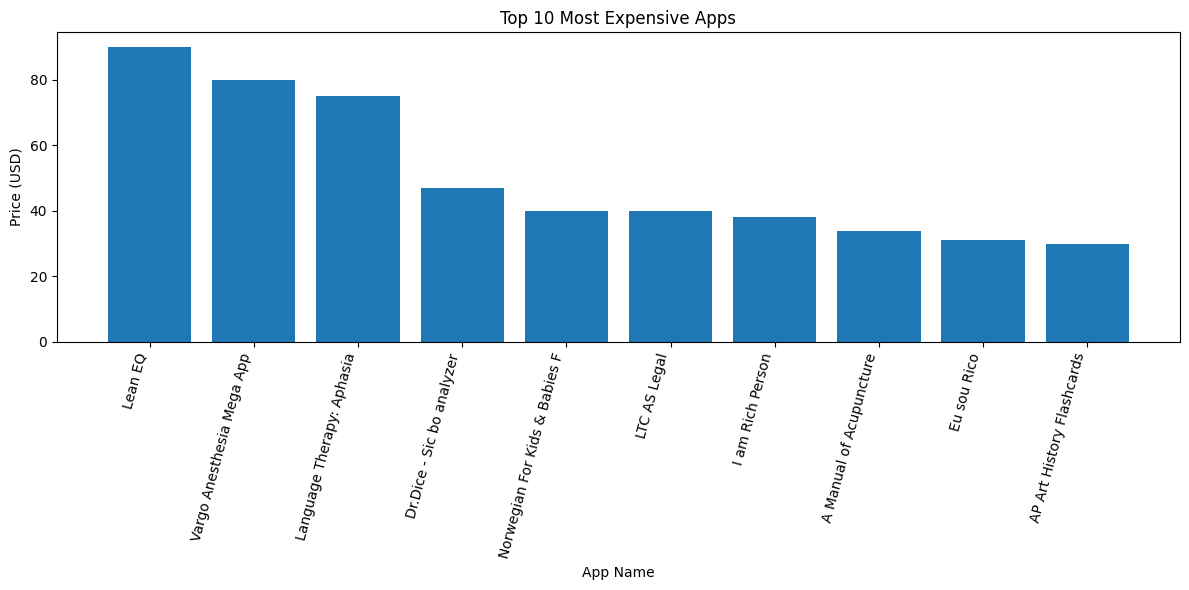

In [39]:
# Filter only paid apps and get top 10 most expensive
paid_apps = df[df['Price'] > 0]
top10 = paid_apps.sort_values(by='Price', ascending=False).head(10)

# Print the Top-10 list (App, Category, Price, Installs, Rating)
print("Top 10 Most Expensive Apps:\n")
for i, row in enumerate(top10.itertuples(index=False), start=1):
    print(f"{i}. {row.App} | Category: {row.Category} | Price: ${row.Price:.2f} | Installs: {row.Installs} | Rating: {row.Rating}")

# Plot bar chart of prices
plt.figure(figsize=(12, 6))
plt.bar(top10['App'], top10['Price'])
plt.xticks(rotation=75, ha="right")
plt.title("Top 10 Most Expensive Apps")
plt.ylabel("Price (USD)")
plt.xlabel("App Name")
plt.tight_layout()
plt.show()

## Q2: Which genre has the highest number of apps?

Top Genre by number of apps:
Tools with 826 apps

Top 10 Genres:
Genres
Tools              826
Entertainment      557
Education          510
Business           420
Medical            394
Personalization    376
Productivity       373
Lifestyle          362
Finance            338
Sports             331
Name: count, dtype: int64


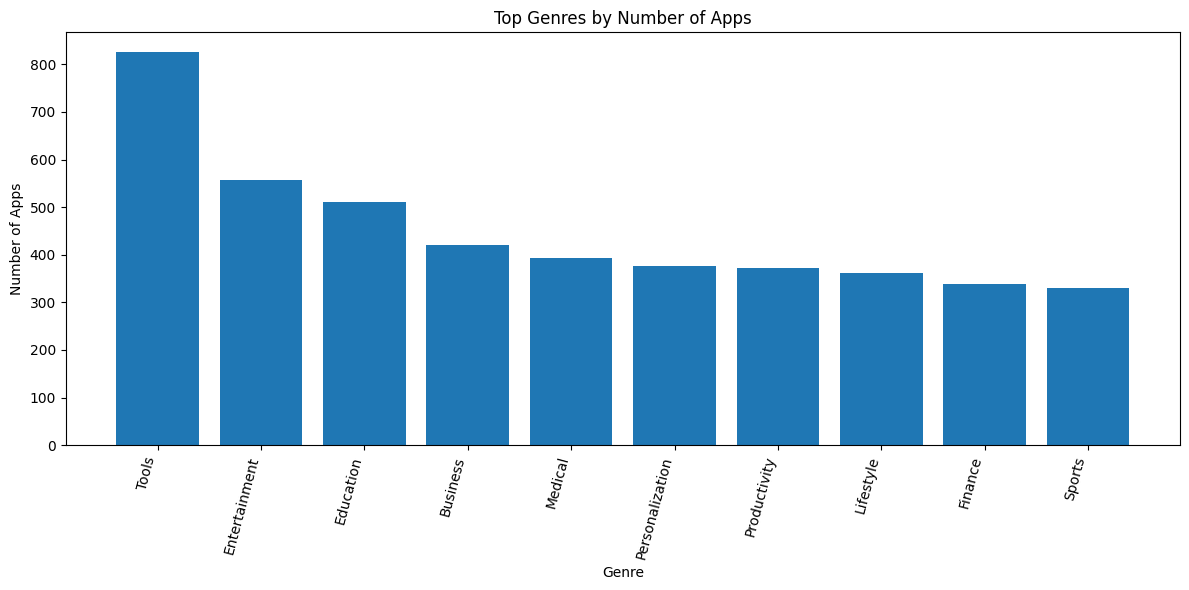

In [40]:
# Count apps per Genre
genre_counts = df['Genres'].value_counts().head(10)

# Print the result
print("Top Genre by number of apps:")
print(f"{genre_counts.index[0]} with {genre_counts.iloc[0]} apps\n")

print("Top 10 Genres:")
print(genre_counts)

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=75, ha="right")
plt.title("Top Genres by Number of Apps")
plt.ylabel("Number of Apps")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

## Q3: What is the average size of free vs. paid apps?


Average Size of Free vs Paid apps (MB):

Type
Free    19.744693
Paid    19.485937
Name: Size, dtype: float64


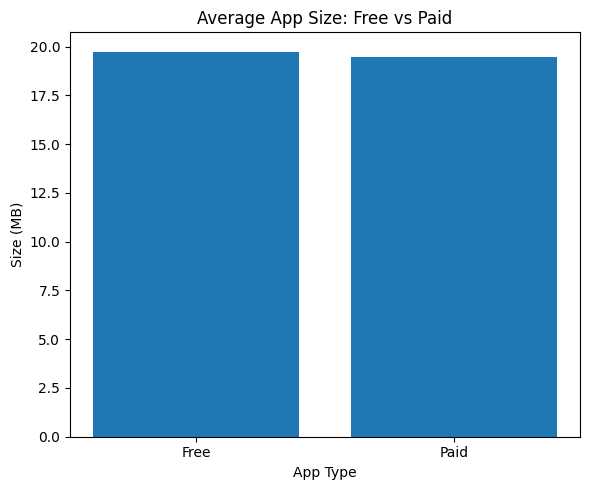

In [41]:
avg_size = df.groupby("Type")["Size"].mean()
print("\nAverage Size of Free vs Paid apps (MB):\n")
print(avg_size)

# ======= Plot the Results =======
plt.figure(figsize=(6, 5))
plt.bar(avg_size.index, avg_size.values)
plt.title("Average App Size: Free vs Paid")
plt.ylabel("Size (MB)")
plt.xlabel("App Type")
plt.tight_layout()
plt.show()

## Q4: What are the top 5 most expensive apps with a perfect rating (5)?

Top 5 Most Expensive Paid Apps with Perfect Rating (5.0):

                                            App Category  Rating  Price  \
5489                  AP Art History Flashcards   Family     5.0  29.99   
7477                 USMLE Step 2 CK Flashcards   Family     5.0  19.99   
5482                 meStudying: AP English Lit   Family     5.0   4.99   
5246                      Hey AJ! It's Bedtime!   Family     5.0   4.99   
7204  TI-84 CE Graphing Calculator Manual TI 84   Family     5.0   4.99   

     Installs  
5489      10+  
7477      10+  
5482      10+  
5246      10+  
7204     100+  


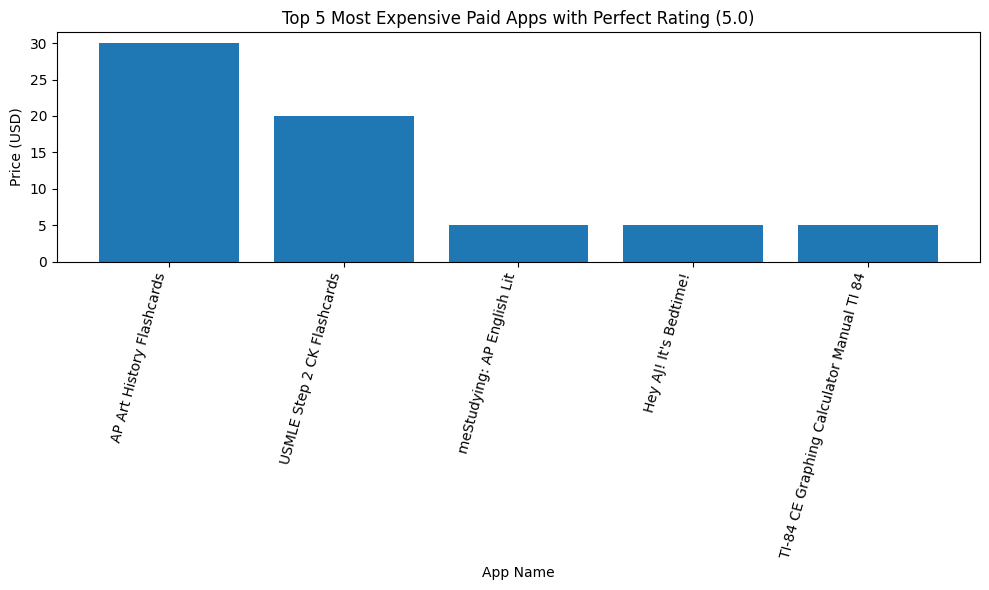

In [42]:
# Filter paid apps with perfect rating 5.0
perfect_paid = df[(df['Type'] == 'Paid') & (df['Rating'] == 5.0)]

# Top 5 most expensive among them
top5_perfect = perfect_paid.sort_values(by='Price', ascending=False).head(5)

print("Top 5 Most Expensive Paid Apps with Perfect Rating (5.0):\n")
print(top5_perfect[['App', 'Category', 'Rating', 'Price', 'Installs']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top5_perfect['App'], top5_perfect['Price'])
plt.xticks(rotation=75, ha="right")
plt.title("Top 5 Most Expensive Paid Apps with Perfect Rating (5.0)")
plt.ylabel("Price (USD)")
plt.xlabel("App Name")
plt.tight_layout()
plt.show()

## Q5: How many apps have received more than 50K reviews?

Number of apps with more than 50K reviews: 1945


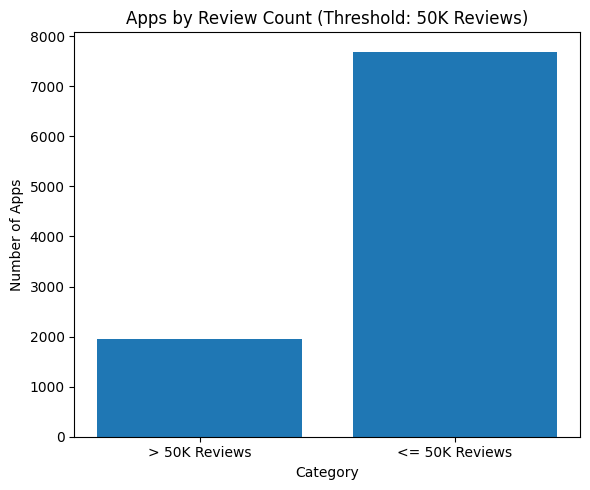

In [43]:

# Filter apps with >50K reviews
apps_50k = df[df['Reviews'] > 50000]
count_50k = apps_50k.shape[0]

print(f"Number of apps with more than 50K reviews: {count_50k}")

# Prepare data for plot
labels = ['> 50K Reviews', '<= 50K Reviews']
counts = [count_50k, df.shape[0] - count_50k]

# Plot
plt.figure(figsize=(6,5))
plt.bar(labels, counts)
plt.title("Apps by Review Count (Threshold: 50K Reviews)")
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

## Q6: What is the average price of apps, grouped by genre and number of installs?


Top 20 (Highest Average Price) by Genre & Installs:
Finance | 0+ → $30.99
Education | 5+ → $13.33
Auto & Vehicles | 50+ → $9.99
Finance | 1+ → $8.75
Photography | 10+ → $8.09
Educational;Education | 1,000+ → $7.49
Casino | 100+ → $7.00
Social | 0+ → $7.00
Medical | 1,000+ → $6.29
Role Playing | 50,000+ → $6.10
Books & Reference | 1+ → $5.99
Role Playing | 10,000+ → $5.62
Simulation;Education | 100,000+ → $4.99
Board;Brain Games | 5,000+ → $4.99
Adventure;Action & Adventure | 50,000+ → $4.99
Sports;Action & Adventure | 500,000+ → $4.99
Adventure;Action & Adventure | 100,000+ → $4.99
Casual;Pretend Play | 10,000+ → $4.99
Simulation | 100+ → $4.66
Parenting | 100+ → $4.59


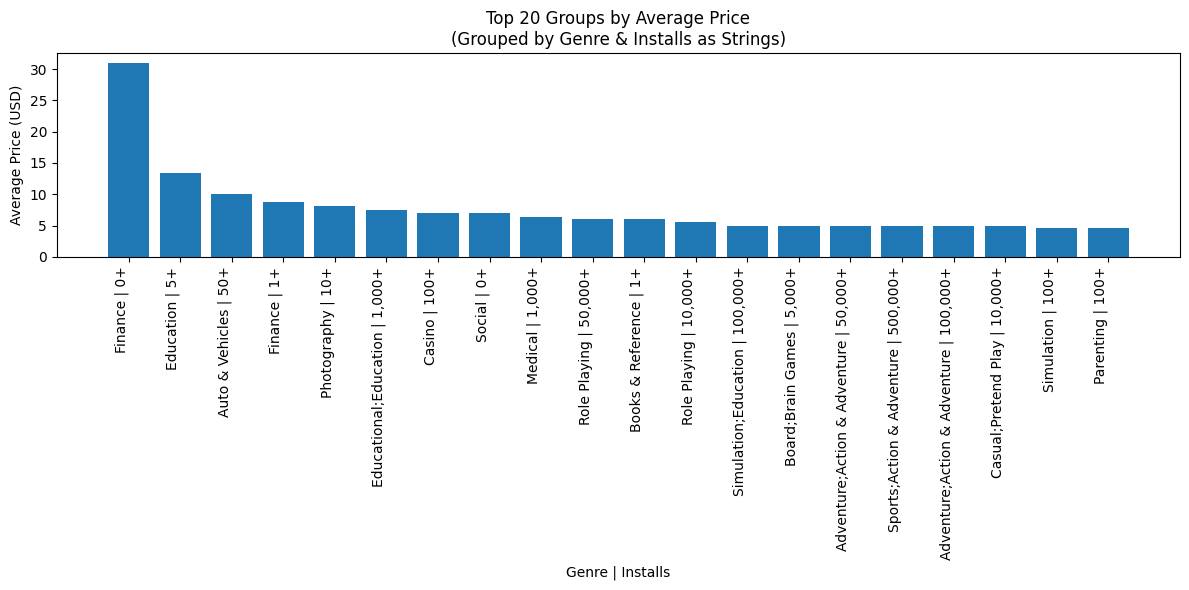

In [44]:
# Group by Genres and Installs (as string) to compute average price
avg_price_grouped = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()

# Sort descending by price and take top 20
top20 = avg_price_grouped.sort_values(by='Price', ascending=False).head(20)




print("\nTop 20 (Highest Average Price) by Genre & Installs:")
for i, row in top20.iterrows():
    print(f"{row['Genres']} | {row['Installs']} → ${row['Price']:.2f}")

plt.figure(figsize=(12, 6))
plt.bar(top20['Genres'] + " | " + top20['Installs'], top20['Price'])
plt.xticks(rotation=90, ha="right")
plt.title("Top 20 Groups by Average Price\n(Grouped by Genre & Installs as Strings)")
plt.ylabel("Average Price (USD)")
plt.xlabel("Genre | Installs")
plt.tight_layout()
plt.show()

## Q7: How many apps have a rating higher than 4.7, and what is their average price?

In [45]:
# Filter apps with rating > 4.7
high_rating_apps = df[df['Rating'] > 4.7]

# Count them + calculate average price
count_high_rating = high_rating_apps.shape[0]
avg_price_high_rating = high_rating_apps['Price'].mean()

print(f"Number of apps with rating > 4.7: {count_high_rating}")
print(f"Average price of these apps: ${avg_price_high_rating:.2f}")

Number of apps with rating > 4.7: 577
Average price of these apps: $0.46


## Q8: What is Google's estimated revenue from apps with 5,000,000+ installs?

In [46]:
# Filter apps with Installs as string including "5,000,000+"
top_installs = df[(df['Installs'] == "5,000,000+") & (df['Price'] > 0)]

# Helper function to extract numeric value from string for revenue calc only
def get_num(inst_str):
    return int(re.sub(r'[\+,]', '', inst_str))

# Estimate revenue
top_installs['Estimated_Installs'] = top_installs['Installs'].apply(get_num)
total_revenue = (top_installs['Estimated_Installs'] * top_installs['Price']).sum()

# Google takes 30%
google_rev = total_revenue * 0.30

print(f"Number of Paid Apps with Installs '5,000,000+': {top_installs.shape[0]}")
print(f"Estimated Developer Revenue: ${total_revenue:,.2f}")
print(f"Estimated Google Revenue (30% cut): ${google_rev:,.2f}")

# Print a preview list
print("\nApps used in estimation:")
print(top_installs[['App', 'Installs', 'Price']].head(10))

Number of Paid Apps with Installs '5,000,000+': 0
Estimated Developer Revenue: $0.00
Estimated Google Revenue (30% cut): $0.00

Apps used in estimation:
Empty DataFrame
Columns: [App, Installs, Price]
Index: []


## Q9: What are the maximum and minimum sizes of free vs. paid apps?


Maximum & Minimum Sizes of Free vs Paid Apps (MB):

      min    max
Type            
Free  1.0  100.0
Paid  1.0  100.0


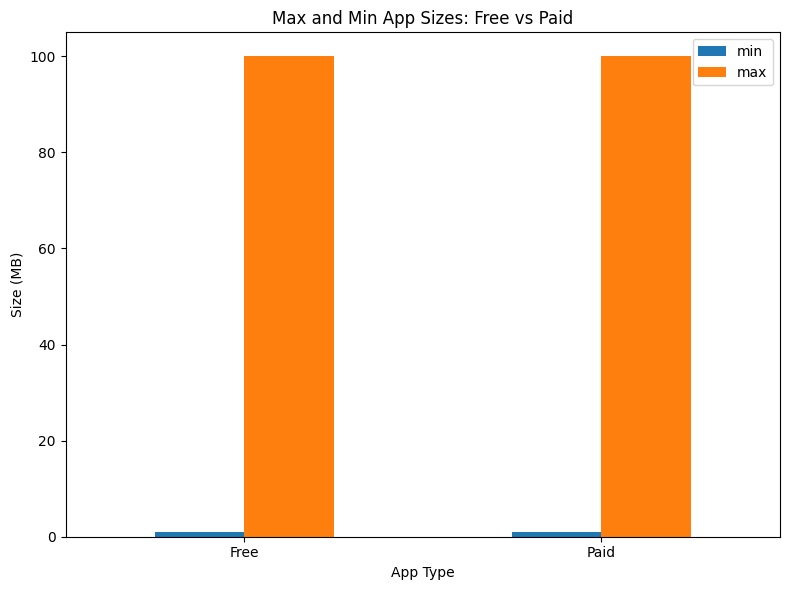

In [47]:
# Group: Free vs Paid → max & min size
size_stats = df.groupby("Type")["Size"].agg(["min", "max"])

print("\nMaximum & Minimum Sizes of Free vs Paid Apps (MB):\n")
print(size_stats)

# Plot
size_stats.plot(kind='bar', figsize=(8,6), title="Max and Min App Sizes: Free vs Paid")
plt.ylabel("Size (MB)")
plt.xlabel("App Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Q10: Is there a correlation between an app’s rating, number of reviews, size, and its price?


Correlation between Rating, Reviews, Size and Price:

           Rating   Reviews      Size     Price
Rating   1.000000  0.050775  0.038491  0.022115
Reviews  0.050775  1.000000  0.060772 -0.017233
Size     0.038491  0.060772  1.000000  0.002835
Price    0.022115 -0.017233  0.002835  1.000000


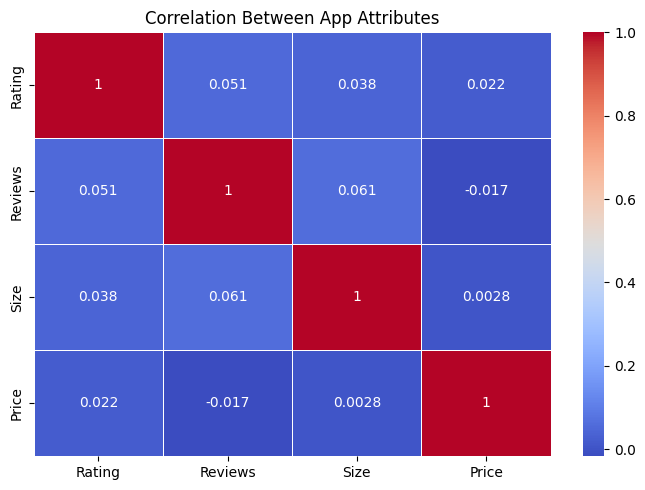

In [48]:
# Select relevant columns
numeric_df = df[["Rating", "Reviews", "Size", "Price"]].dropna()

# Correlation matrix
corr_matrix = numeric_df.corr()

print("\nCorrelation between Rating, Reviews, Size and Price:\n")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between App Attributes")
plt.tight_layout()
plt.show()

## Q11: How many apps exist for each type (free/paid) across different content ratings?


Number of apps for each Type across different Content Ratings:

   Type   Content Rating  Count
0  Free  Adults Only 18+      3
1  Free         Everyone   7248
2  Free     Everyone 10+    291
3  Free       Mature 17+    375
4  Free             Teen    984
5  Free          Unrated      2
6  Paid         Everyone    636
7  Paid     Everyone 10+     31
8  Paid       Mature 17+     18
9  Paid             Teen     51


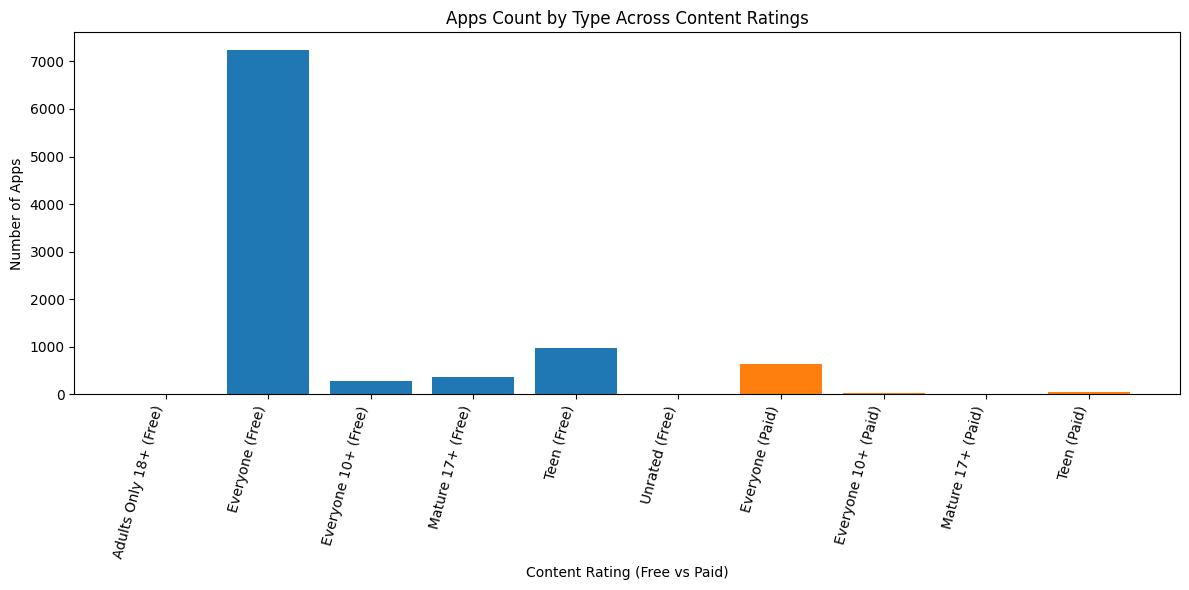

In [49]:
# Group by Type and Content Rating
type_content_counts = df.groupby(["Type", "Content Rating"]).size().reset_index(name="Count")

print("\nNumber of apps for each Type across different Content Ratings:\n")
print(type_content_counts)

# Plot
plt.figure(figsize=(12, 6))
for t in type_content_counts["Type"].unique():
    subset = type_content_counts[type_content_counts["Type"] == t]
    plt.bar(subset["Content Rating"] + " (" + t + ")", subset["Count"], label=t)

plt.title("Apps Count by Type Across Content Ratings")
plt.xlabel("Content Rating (Free vs Paid)")
plt.ylabel("Number of Apps")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

## Q12: How many apps are compatible with Android version 4.x?

In [50]:
# تأكد إن العمود نصي
df["Android Ver"] = df["Android Ver"].astype(str)

# فلترة التطبيقات المتوافقة مع إصدارات 4.x
android_4x = df[df["Android Ver"].str.startswith("4.")]

# العدد الإجمالي
count_4x = android_4x.shape[0]
print(f"Number of apps compatible with Android 4.x: {count_4x}")

print("\nBy Type (Free vs Paid):")
print(android_4x["Type"].value_counts())

Number of apps compatible with Android 4.x: 7279

By Type (Free vs Paid):
Type
Free    6858
Paid     421
Name: count, dtype: int64


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9639 non-null   object 
 1   Category        9639 non-null   object 
 2   Rating          9639 non-null   float64
 3   Reviews         9639 non-null   int64  
 4   Size            9639 non-null   float64
 5   Installs        9639 non-null   object 
 6   Type            9639 non-null   object 
 7   Price           9639 non-null   float64
 8   Content Rating  9639 non-null   object 
 9   Genres          9639 non-null   object 
 10  Android Ver     9639 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 903.7+ KB
